In [122]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [81]:
#turns str glich name into a 1 or 0
def gliches_get_stiches(aList,glich):
    new_list = []
    for i in range(len(aList)):
        if aList[i] == glich:
            new_list += [1]
        else:
            new_list += [0]
    return np.array(new_list)

In [120]:
data = pd.read_csv('trainingset_v1d1_metadata.csv')

#glich to test
glich = 'Whistle'

#what features do we want 
column_selection = ["duration","peak_frequency","central_freq","amplitude"]


#training data
data_train = data[data['sample_type'] == 'train']
glich_list = data_train['label'].tolist()
y_train = gliches_get_stiches(glich_list,glich)
x_train = np.array(data_train[column_selection])

#testing data
data_test = data[data['sample_type'] == 'test']
glich_list2 = data_test['label'].tolist()
y_test = gliches_get_stiches(glich_list2,glich)
x_test = np.array(data_test[column_selection])

#validation data
data_val = data[data['sample_type'] == 'validation']
glich_list3 = data_val['label'].tolist()
y_val = gliches_get_stiches(glich_list3,glich)
x_val = np.array(data_val[column_selection])


In [108]:
def score(y,y_pred):
    return np.mean(np.abs(y-y_pred)/y)

In [109]:
model = keras.Sequential()

In [139]:
input_len = len(column_selection)
model.add(keras.layers.Dense(50, input_dim=input_len, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(rate)) 
model.add(keras.layers.ActivityRegularization(l1=0.0, l2=0.0)) 
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1))

In [140]:
model.compile(loss='mean_squared_error', optimizer='adam')
callbacks = [EarlyStopping(monitor='val_loss', patience=20),
            ModelCheckpoint(filepath='best_model.h5',
                            monitor='val_loss',
                            save_best_only=True,
                           verbose=1)]

In [141]:
#history = model.fit(x_train, y_train,
#                        epochs=50, batch_size=128)
history = model.fit(x_train, y_train,
            epochs=200, 
            batch_size=128, 
            #callbacks=callbacks,
            validation_data=(x_val, y_val)
                   )

Train on 5587 samples, validate on 1200 samples
Epoch 1/200
5587/5587 [==============================] - 3s 613us/step - loss: 0.0539 - val_loss: 0.1245
Epoch 2/200
5587/5587 [==============================] - 0s 85us/step - loss: 0.0345 - val_loss: 0.0541
Epoch 3/200
5587/5587 [==============================] - 0s 87us/step - loss: 0.0341 - val_loss: 0.0456
Epoch 4/200
5587/5587 [==============================] - 0s 77us/step - loss: 0.0338 - val_loss: 0.0391
Epoch 5/200
5587/5587 [==============================] - 0s 71us/step - loss: 0.0334 - val_loss: 0.0374
Epoch 6/200
5587/5587 [==============================] - 0s 71us/step - loss: 0.0329 - val_loss: 0.0344
Epoch 7/200
5587/5587 [==============================] - 0s 88us/step - loss: 0.0325 - val_loss: 0.0372
Epoch 8/200
5587/5587 [==============================] - 0s 80us/step - loss: 0.0304 - val_loss: 0.0372
Epoch 9/200
5587/5587 [==============================] - 0s 80us/step - loss: 0.0296 - val_loss: 0.0340
Epoch 10/200
55

5587/5587 [==============================] - 0s 75us/step - loss: 0.0290 - val_loss: 0.0284
Epoch 79/200
5587/5587 [==============================] - 0s 74us/step - loss: 0.0292 - val_loss: 0.0287
Epoch 80/200
5587/5587 [==============================] - 0s 70us/step - loss: 0.0289 - val_loss: 0.0281
Epoch 81/200
5587/5587 [==============================] - 0s 66us/step - loss: 0.0293 - val_loss: 0.0282
Epoch 82/200
5587/5587 [==============================] - 0s 72us/step - loss: 0.0290 - val_loss: 0.0285
Epoch 83/200
5587/5587 [==============================] - 0s 71us/step - loss: 0.0287 - val_loss: 0.0280
Epoch 84/200
5587/5587 [==============================] - 0s 71us/step - loss: 0.0292 - val_loss: 0.0277
Epoch 85/200
5587/5587 [==============================] - 0s 81us/step - loss: 0.0288 - val_loss: 0.0278
Epoch 86/200
5587/5587 [==============================] - 0s 71us/step - loss: 0.0282 - val_loss: 0.0277
Epoch 87/200
5587/5587 [==============================] - 0s 73us/st

5587/5587 [==============================] - 0s 70us/step - loss: 0.0285 - val_loss: 0.0265
Epoch 156/200
5587/5587 [==============================] - 0s 65us/step - loss: 0.0274 - val_loss: 0.0265
Epoch 157/200
5587/5587 [==============================] - 0s 65us/step - loss: 0.0277 - val_loss: 0.0264
Epoch 158/200
5587/5587 [==============================] - 0s 62us/step - loss: 0.0280 - val_loss: 0.0290
Epoch 159/200
5587/5587 [==============================] - 0s 66us/step - loss: 0.0277 - val_loss: 0.0297
Epoch 160/200
5587/5587 [==============================] - 0s 71us/step - loss: 0.0277 - val_loss: 0.0264
Epoch 161/200
5587/5587 [==============================] - 0s 71us/step - loss: 0.0276 - val_loss: 0.0269
Epoch 162/200
5587/5587 [==============================] - 0s 89us/step - loss: 0.0280 - val_loss: 0.0315
Epoch 163/200
5587/5587 [==============================] - 0s 74us/step - loss: 0.0270 - val_loss: 0.0263
Epoch 164/200
5587/5587 [==============================] - 0

In [142]:
preds = model.predict(x_test)
score(preds, y_test)

-1.677287125968072

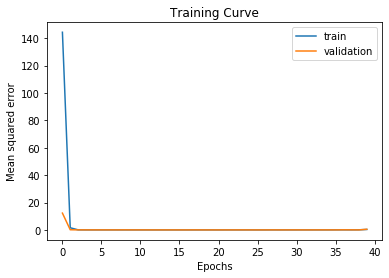

In [136]:
import matplotlib.pyplot as plt
def plot_loss(hist):
    %matplotlib inline
    plt.title('Training Curve')
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='validation')
    plt.xlabel("Epochs")
    plt.ylabel("Mean squared error")
    plt.legend()
    plt.show()

plot_loss(history)